# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


<div class="alert alert-success" role="alert">
 timestamp must be converted to datetime type, is_holiday and is_weekend must be converted to boolean type.
</div>

In [4]:
df.shape

(17414, 10)

### 3.Check missing values and if there are any dublicate rows or not.

In [5]:
df.duplicated().value_counts()

False    17414
dtype: int64

<div class="alert alert-success" role="alert">
  Check to see if there are more than one of the same lines. As a result, all rows are returned False. So there is no duplicate. 
</div>

In [6]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

<div class="alert alert-success" role="alert">
  I saw that there was no empty data in the data at all. So I don't need to drop these with dropna.
</div>

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

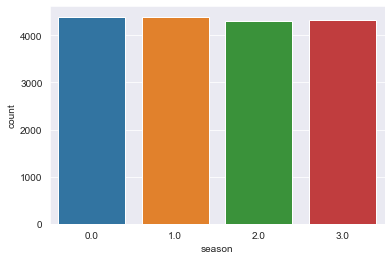

In [7]:
# season
ax = sns.countplot("season", data=df);

<div class="alert alert-success" role="alert">
 It shows the number of records according to seosons.
</div>

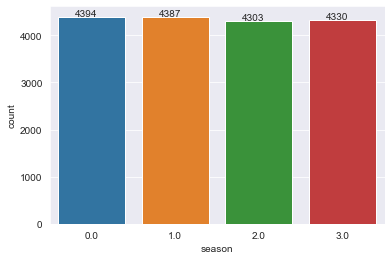

In [8]:
# is_weekend
ax = sns.countplot("season", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

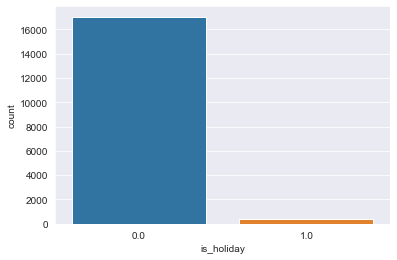

In [9]:
# is_holiday
sns.countplot("is_holiday", data=df);

<div class="alert alert-success" role="alert">
 It shows the number of records depending on whether there are holidays or not.
</div>

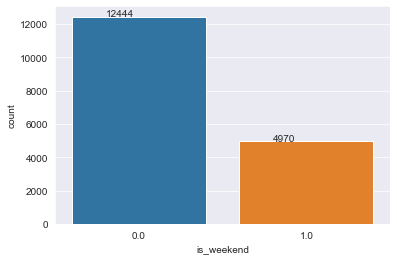

In [10]:
# is_weekend
ax = sns.countplot("is_weekend", data=df); # bu plotu bir axes'e atadık ki onun patch'ini alıp for döngüsüne kullanabilelim.

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

<div class="alert alert-success" role="alert">
  It shows the number of entries depending on whether it's a weekend or not.
</div>

<div class="alert alert-success" role="alert">
 Let's print the values on the bars using Annotate.
The first parameter of the annotate is the value to be entered on top of the bar.
Here we converted the height value to string and printed it, we could also leave it as an integer. according to the situation. The second parameter shows the place where the string will be written as a numeric value in x (horizontal) and height (vertical). patches --> each bar is a patch.
</div>

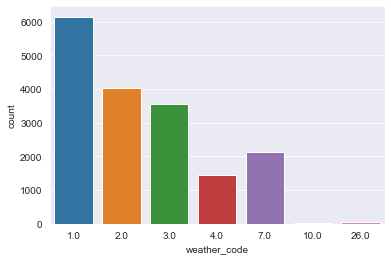

In [11]:
# weather_code
ax = sns.countplot("weather_code", data=df);

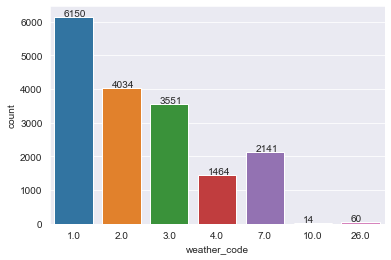

In [12]:
ax = sns.countplot("weather_code", data=df);

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

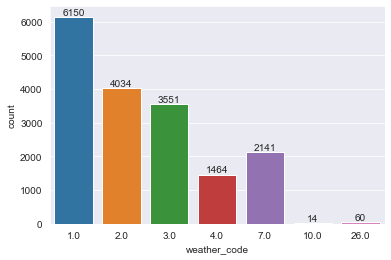

In [13]:
sns.countplot(data = df, x = "weather_code");

code = df.weather_code.value_counts().sort_index()
for index, value in enumerate(code):
    plt.text(index, value, str(value), ha="center", va="bottom")

---
**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [14]:
df.timestamp = pd.to_datetime(df.timestamp)

<div class="alert alert-success" role="alert">
  It will go through the timestamp column itself and translate each of them into datetime. (We changed it to datetime and assigned it to ourselves again.)
</div>

In [15]:
df.set_index("timestamp", inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-success" role="alert">
  We can do analysis more easily by converting indexes. i've indexed the timestamp column.
</div>

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


<div class="alert alert-success" role="alert">
  There is a time stamp of exactly 2 years. making feature engineering by getting the information 'year, month, day_of_ month, day_of_ week, hour'.
</div>

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [17]:
df["year-month"] = df.index.strftime("%Y-%m")
df["year"] =  df.index.year
df["month"] =  df.index.month
df["day_of_month"] =  df.index.day
df["day_of_week"] =  df.index.dayofweek
df["day_of_name"] = df.index.day_name()
df["hour"] = df.index.hour

In [18]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year-month,year,month,day_of_month,day_of_week,day_of_name,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,Sunday,4


### 7.Visualize the correlation with a heatmap

<AxesSubplot:>

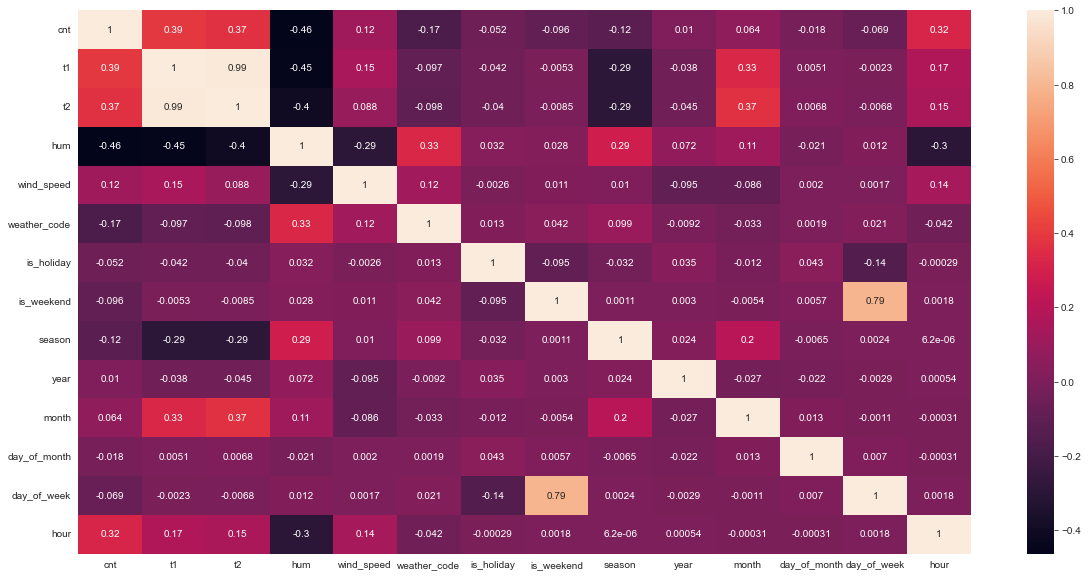

In [19]:
# for all variables 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),  annot=True)

<div class="alert alert-success" role="alert">
  t2 and t1 are too much correlation, and they mean the same thing, we can drop one. isweekend and dayofweek have high correlation. humidity is also a factor. there is also less humid air being shared on bicycles.
</div>

In [20]:
df_corr_cnt = df.corr()[["cnt"]].sort_values(by="cnt", ascending=False) 
df_corr_cnt

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
year,0.010046
day_of_month,-0.017887
is_holiday,-0.051698
day_of_week,-0.068688


<div class="alert alert-success" role="alert">
  Look at the correlation of the target column with the others.
</div>

<AxesSubplot:>

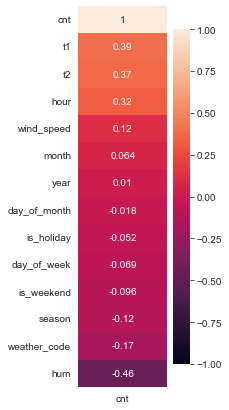

In [21]:
# for the target variable
plt.figure(figsize=(2,7))
sns.heatmap(df_corr_cnt, annot=True, vmin=-1, vmax=1)

<div class="alert alert-success" role="alert">
  Set the color scale from -1 to 1 with vmin= dec1.
</div>

<AxesSubplot:>

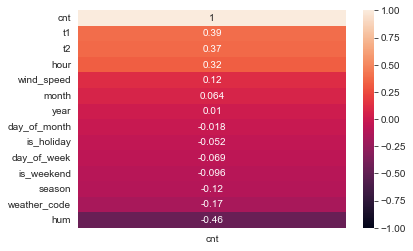

In [22]:
sns.heatmap(df.corr()[["cnt"]].sort_values(by="cnt", ascending=False), annot=True, vmin=-1, vmax=1)

<div class="alert alert-success" role="alert">
  Sort the corr values from small to large.
</div>

### 8. Visualize the correlation of the target variable and the other features with barplot

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

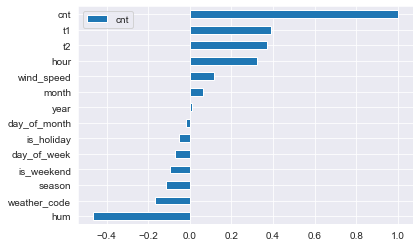

In [23]:
#with pandas
plt.figure(figsize=(10,6))

df.corr()[["cnt"]].sort_values(by="cnt").plot.barh()

<AxesSubplot:>

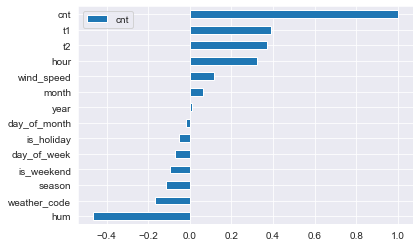

In [24]:
 df.corr()[["cnt"]].sort_values(by="cnt", ascending=True).plot.barh()


### 9.Plot bike shares over time use lineplot

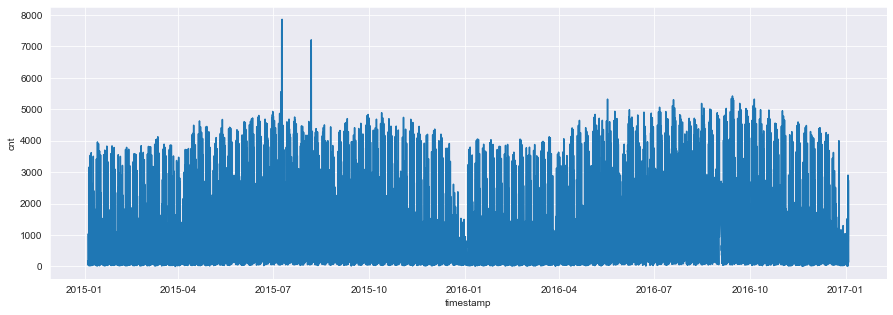

In [25]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df.index, y="cnt", data=df)
plt.show()

<div class="alert alert-success" role="alert">
  It is an analysis graph of the total shared bicycles according to the times. March April 2015 there are pick-up points . In those months, the government has been campaigning to promote health and economic benefits.The state encouraged cycling in peak places, so there was an outlier there.
</div>

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [26]:
df_sum = pd.DataFrame(df.groupby("year-month").cnt.sum())
df_sum

,cnt
year-month,
2015-01,546639
2015-02,543594
2015-03,695934
2015-04,831582
2015-05,895413
2015-06,1033252
2015-07,1120687
2015-08,1033951
2015-09,892478


<div class="alert alert-success" role="alert">
 Let me first see the sum of the cnt numbers by month.
I have created a new dataframe named df_sum consisting of the above information.Now let's plot the cnt numbers by month using this dataframe.
</div>

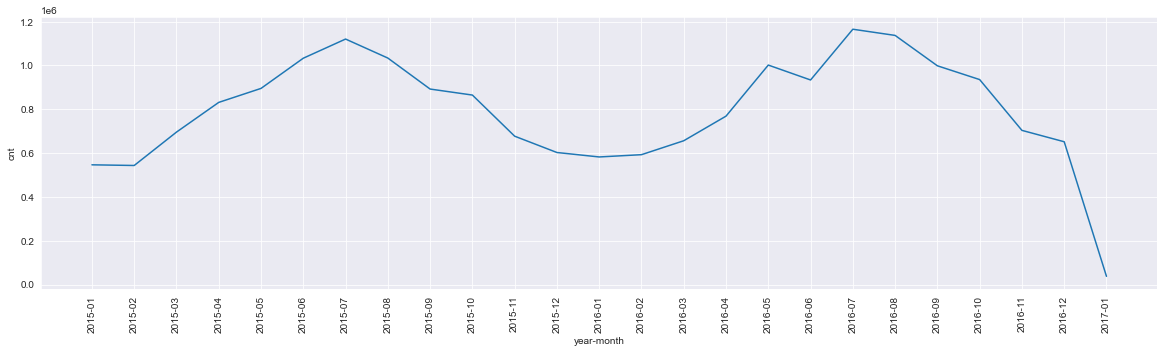

In [27]:
# with lineplot
plt.figure(figsize=(20,5))
sns.lineplot(x="year-month",y="cnt", data = df_sum)
plt.xticks(rotation=90);

<div class="alert alert-success" role="alert">
  We see the number of bicycles shared in the 2-year dataframe. We are doing seasonal analysis. we can also see the trend of 2015 and 2016 in 2017 and 2018.
</div>

<AxesSubplot:xlabel='month', ylabel='cnt'>

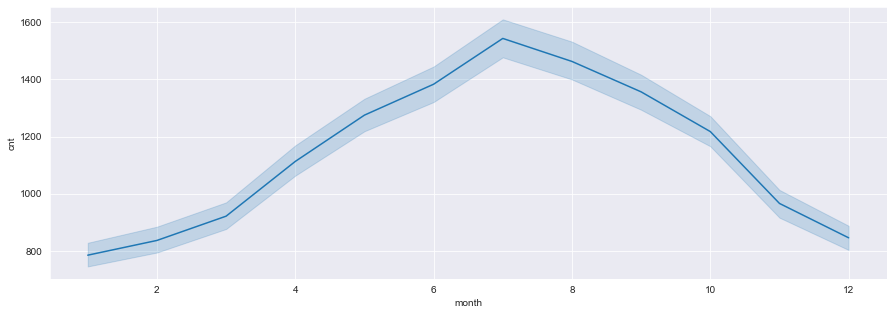

In [28]:
# with lineplot
plt.figure(figsize=(15,5))
sns.lineplot(x= "month", y="cnt", data=df)

<div class="alert alert-success" role="alert">
A graph is created based on the months of each year.
</div>

<AxesSubplot:xlabel='month', ylabel='cnt'>

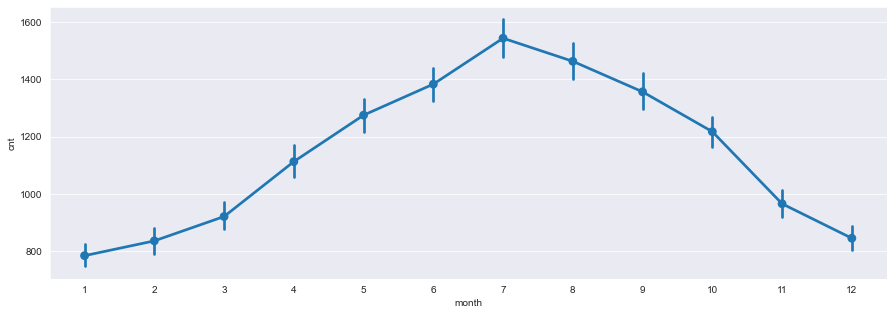

In [29]:
# with pointplot
plt.figure(figsize=(15,5))
sns.pointplot(x= "month", y="cnt", data=df)

<div class="alert alert-success" role="alert">
 ci exceeds its values.
    </div>

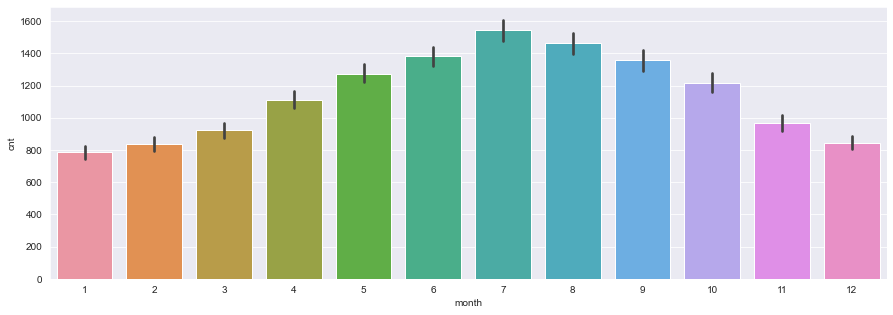

In [30]:
# with barplot
plt.figure(figsize=(15,5))
sns.barplot(x= "month", y="cnt", data=df);

<div class="alert alert-success" role="alert">
In the 2-year data set, the trend is throughout the months; it increases in 6 and 7 months and then decreases again.
</div>

### 11.Plot bike shares by hours on (holidays, weekend, season)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

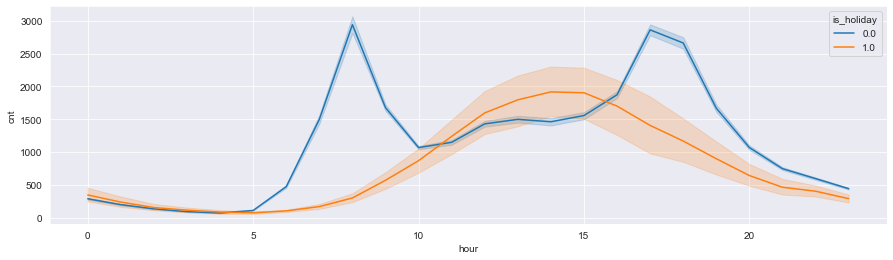

In [31]:
# with lineplot (*whether it is a holiday or not*)

plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="is_holiday")

<AxesSubplot:xlabel='hour', ylabel='cnt'>

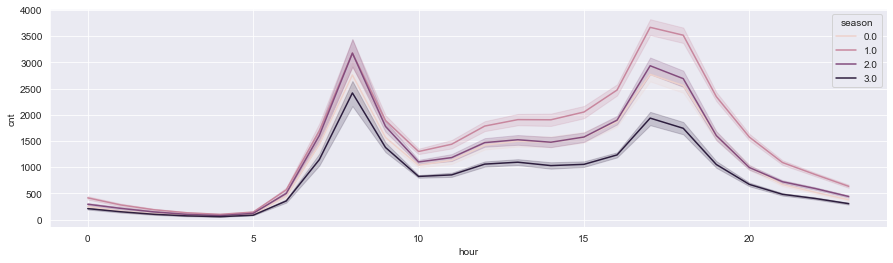

In [33]:
# with lineplot (*You may want to see seasonal breakdowns*)

plt.figure(figsize=(15,4))
sns.lineplot(x= "hour", y="cnt", data=df, hue="season")

<div class="alert alert-success" role="alert">
It seems that all the seasons have the same graphics.</div>

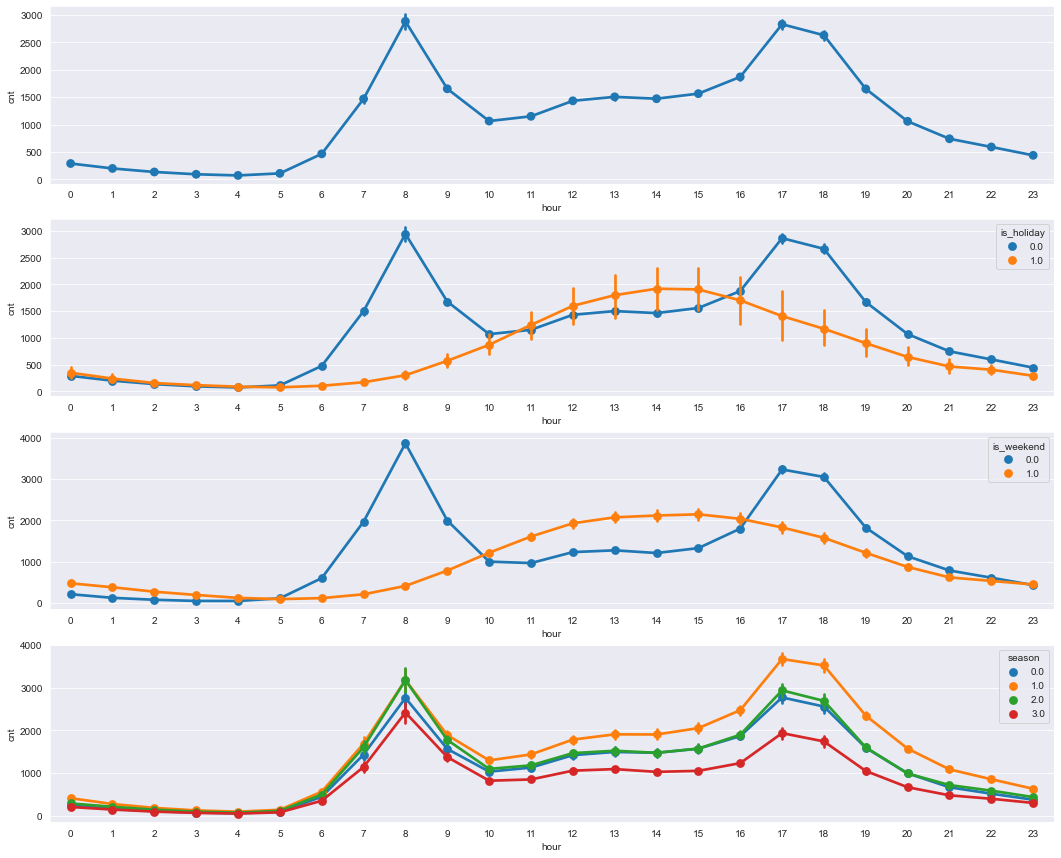

In [34]:
# with pointplot

fig, ax = plt.subplots(ncols=1, nrows=4, figsize = (18,15))

sns.pointplot(data=df, x="hour", y="cnt", ax = ax[0])
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[1], hue="is_holiday")
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[2], hue="is_weekend")
sns.pointplot(data=df, x="hour", y="cnt", ax = ax[3], hue="season");

<div class="alert alert-success" role="alert">
  Gives bike share analysis on each satte in the first graph. In the second graph, it gives the number of cnts during public holidays and non-public holidays. On the third chart, the number of counts has been changed twice in a row. In the fourth chart, the trend is the same, but the count values are slightly different and give the total count values for all time zones in the dataset.
</div>

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

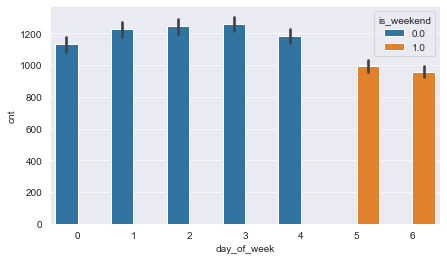

In [35]:
# with barplot

plt.figure(figsize=(7,4))
sns.barplot(x="day_of_week", y="cnt", data=df, hue="is_weekend");

<div class="alert alert-success" role="alert">
  barplot brings cnt mean as deafult.
Since there are both weekdays and weekends within the days of the week, even though we added is_weekend as hue, it didn't break down the bars! Only the weekend showed a different color.
</div>

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

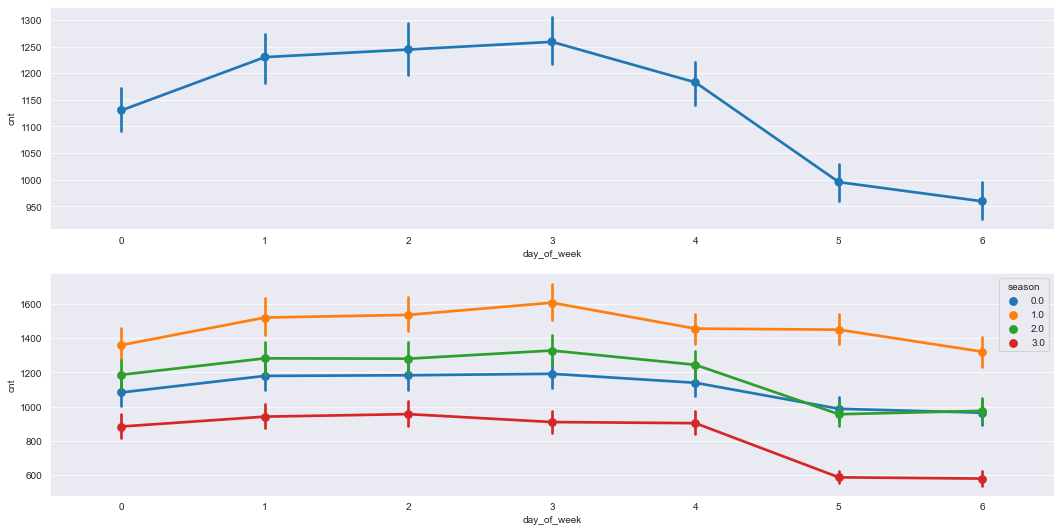

In [36]:
# with pointplot

fig , ax = plt.subplots(2,1, figsize=(18,9))

sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax[0])
sns.pointplot(data=df, x="day_of_week", y="cnt", ax=ax[1], hue="season")

<div class="alert alert-success" role="alert">
  Let's see and compare the days in two separate axes, both in general and according to the seasons.
</div>

### 13.Plot bike shares by day of month

In [38]:
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

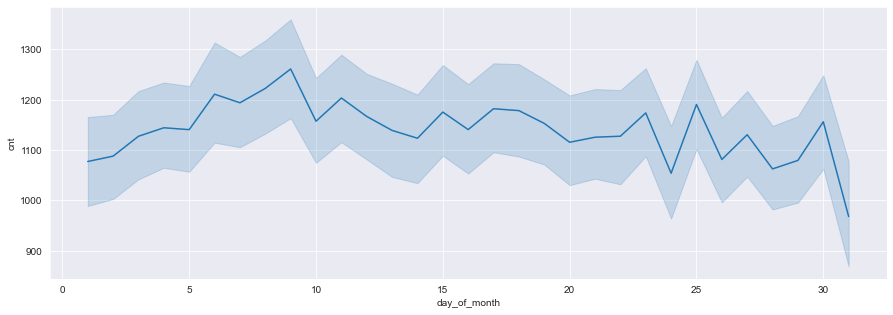

In [39]:
#with lineplot

plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="day_of_month", y="cnt")

<div class="alert alert-success" role="alert">
First group it by day_of_month and then average its cnt.
i made the type integer because it will float because of #mean. We just rounded it up because it would take the part before the comma. Now let's draw our lineplot. (when we group it with groupby, day_of_month will be on the x axis)
</div>

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

<AxesSubplot:xlabel='year', ylabel='cnt'>

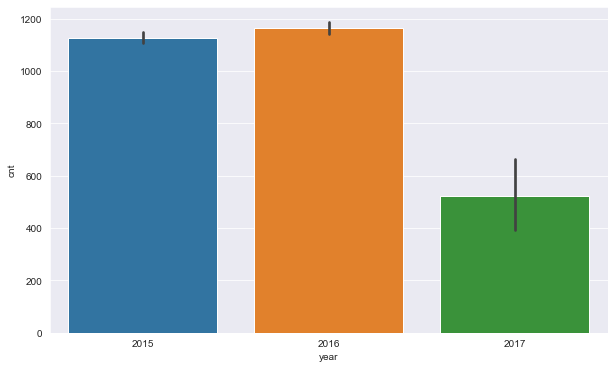

In [40]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(data=df, x="year",y="cnt")

<AxesSubplot:xlabel='season', ylabel='cnt'>

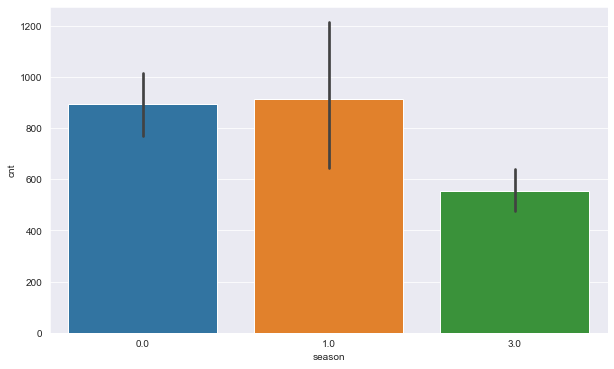

In [41]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(data=df[df["is_holiday"]==1], x="season",y="cnt") 

<div class="alert alert-success" role="alert">
 Get data on public holidays. In the data of the holidays, draw a graph of the cnt numbers by season. First, I pull the cases where the holidays are True from the dataframe and use this data in the barplot that I will draw. i pulled the data of the df on holidays, which is_holiday == 1 True, and assigned it to the df_isholiday variable. sns.i used this variable as data in barplot.
</div>

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [42]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

<div class="alert alert-success" role="alert">
  Compare the status of bicycle rental by weekend and weekday. So I'm going to compare the line numbers weekday and weekend. when I look at the weekend's values, I see that it returns False on line 12444, which means that it is weekday, and on line 4970, it is weekend. That means that when I get the value_count of the is_weekend feature, I will have both weekday and weekend numbers, and I will be able to show it on the pie chart.
</div>

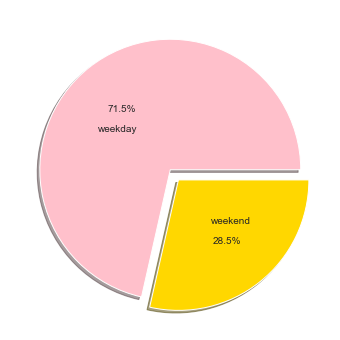

In [45]:
# pie chart
fig, ax = plt.subplots(figsize=(6,6))

colors_list = ["pink","gold"]
explode_list = [0, 0.1]

ax.pie(df.is_weekend.value_counts().values,
      labels=["weekday","weekend"],
      labeldistance=0.4,
      autopct="%.1f%%", shadow=True, 
      colors = colors_list, explode=explode_list);

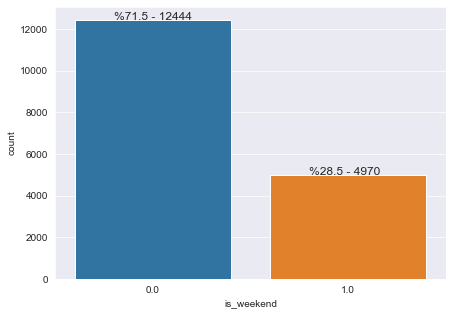

In [46]:
# with countplot
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='is_weekend',data=df)

for bar in ax.patches: 
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)

### 16.Plot the distribution of weather code by seasons

<AxesSubplot:xlabel='weather_code', ylabel='count'>

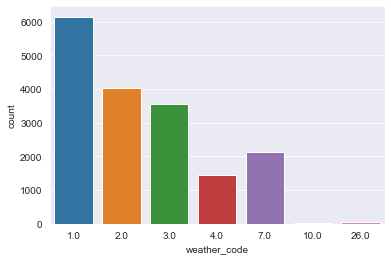

In [47]:
# with countplot
sns.countplot(x="weather_code", data=df)

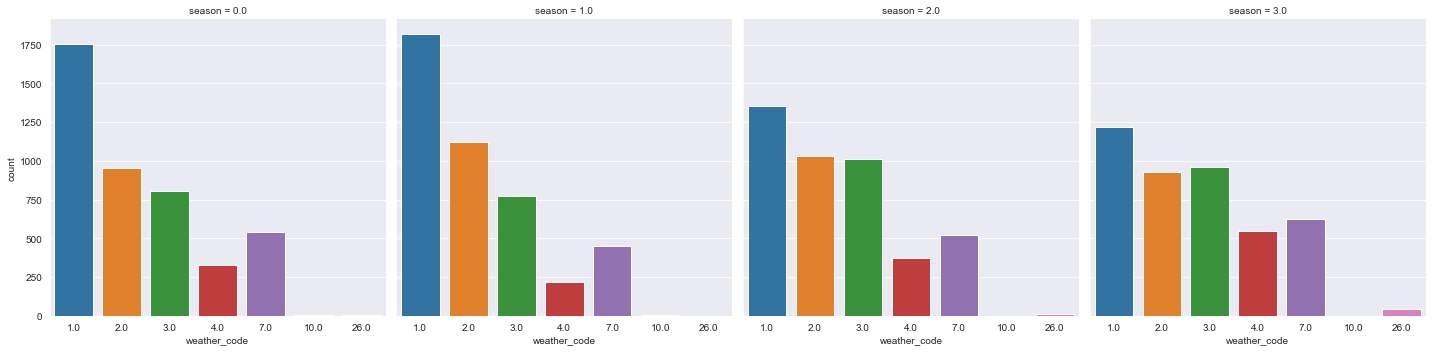

In [48]:
# with catplot
sns.catplot(x="weather_code", data=df, col="season", kind="count")

<div class="alert alert-success" role="alert">
  The difference between col = "season" and hue="season": hue shows categories in axes, while col completely separates them, that is, it shows column by column.

</div>